One-hot-ecoding & regression

In [46]:
import pandas as pd
import seaborn as sns
from sklearn import model_selection

# Import train & test data
df = pd.read_csv("/Users//PycharmProjects/cat_in_the_dat/train.csv")
test = pd.read_csv("/Users//PycharmProjects/cat_in_the_dat/test.csv")

# Stratified K-fold because Skewed data, as we will see below. Also, we have validation data already.
df["kfold"]=-1
df=df.sample(frac=1).reset_index(drop=True)
y=df.target.values
kf=model_selection.StratifiedKFold(n_splits=6)

for f, (t_,v_) in enumerate (kf.split(X=df,y=y)):
    df.loc[v_,'kfold'] = f

df.to_csv("/Users//PycharmProjects/cat_in_the_dat/train_folds.csv",index=False)
df

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,kfold
0,93971,0,0,0,T,N,Green,Trapezoid,Lion,Finland,...,1,Novice,Freezing,i,L,Zq,4,9,0,0
1,295047,1,1,0,F,Y,Red,Trapezoid,Hamster,Canada,...,1,Expert,Freezing,f,S,mc,3,1,0,0
2,236301,1,0,1,T,N,Blue,Square,Axolotl,Canada,...,1,Novice,Freezing,k,J,dh,1,3,1,0
3,83616,0,0,0,F,Y,Blue,Polygon,Cat,Canada,...,1,Contributor,Lava Hot,h,C,Nk,4,1,0,0
4,161439,0,1,0,T,Y,Blue,Trapezoid,Dog,Russia,...,3,Novice,Boiling Hot,g,U,ek,3,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,204036,0,0,1,F,Y,Blue,Circle,Snake,Russia,...,3,Novice,Lava Hot,g,J,AP,4,2,0,5
299996,132053,0,0,0,F,N,Red,Trapezoid,Hamster,China,...,1,Grandmaster,Freezing,g,R,XI,2,4,1,5
299997,93803,0,0,0,T,N,Red,Triangle,Cat,Russia,...,1,Master,Freezing,l,R,NV,1,7,1,5
299998,9009,0,0,0,F,N,Red,Trapezoid,Lion,Finland,...,3,Novice,Cold,i,R,MC,2,3,0,5


There are:
- 5 Binary features(bin_*) [0,4]
- 10 Nominal features (nom_*) [0,9]
- 6 Ordinal features (ord_*) [0,5] 3,4,5 lexically ordered acording to string.ascii_letters.

In [47]:
df.kfold.value_counts()

0    50000
1    50000
2    50000
3    50000
4    50000
5    50000
Name: kfold, dtype: int64

Text(0, 0.5, 'count')

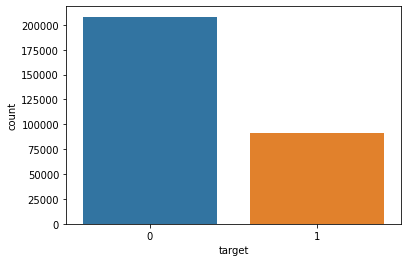

In [48]:
b= sns.countplot(x='target',data=df)
b.set_xlabel('target',fontsize=10)
b.set_ylabel('count',fontsize=10)

# Skewed Dataset: Note that we would use Stratified k-fold to preserve the percentage of samples for each class.
# Best Evaluation metric for this binary classification problem is AUC (Area under the ROC Curve).

In [49]:
# Check missing values
df.isnull().sum()
# lol

id        0
bin_0     0
bin_1     0
bin_2     0
bin_3     0
bin_4     0
nom_0     0
nom_1     0
nom_2     0
nom_3     0
nom_4     0
nom_5     0
nom_6     0
nom_7     0
nom_8     0
nom_9     0
ord_0     0
ord_1     0
ord_2     0
ord_3     0
ord_4     0
ord_5     0
day       0
month     0
target    0
kfold     0
dtype: int64

First & basic approach --> One hot encoding & Logistic regression.

In [62]:
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

def run(fold):

 # define features:
 features =  [f for f in df.columns if f not in ("id","kfold","target")]

 # Convert to string otherwise there will be problems transforming
 for col in features:
    df.loc[:,col] = df[col].astype(str)
 # Get training & Validation data using folds:
 df_train = df[df.kfold != fold].reset_index(drop=True)
 df_valid = df[df.kfold == fold].reset_index(drop=True)

 # onehotencoding
 ohe = preprocessing.OneHotEncoder()
 ohe.fit(df[features])

 # Transform data
 x_train = ohe.transform(df_train[features])
 x_valid = ohe.transform(df_valid[features])
 model = linear_model.LogisticRegression()
 # fit model on ohe training data (df_train)
 model.fit(x_train,df_train.target.values)
 valid_preds = model.predict_proba(x_valid)[:,1]
 auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
 print(f"Fold = {fold}, AUC = {auc}")

In [65]:
for fold in range (6):
    run(fold)

Fold = 0, AUC = 0.800100390817851
Fold = 1, AUC = 0.8014709952285706
Fold = 2, AUC = 0.7970005416267631
Fold = 3, AUC = 0.7969899141429679
Fold = 4, AUC = 0.7962760584640396
Fold = 5, AUC = 0.8002419166484092
